In [1]:
 
!pip install -q keras
import tensorflow as tf
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
 
from numpy.random import seed
import random
seed(2)
#from tensorflow import set_random_seed
 
tf.random.set_seed(2)
#tf.set_random_seed(2)
 
import cv2
from google.colab.patches import cv2_imshow
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix
 
#util
 
from pathlib import Path
import pandas as pd
import numpy as np
from os import getenv
import time
import itertools
import sys
#image processing
from skimage.filters import sobel, scharr
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train='/content/gdrive/My Drive/breast cancer dataset/train'
test='/content/gdrive/My Drive/breast cancer dataset/test'

In [4]:
benign_train='/content/gdrive/My Drive/breast cancer dataset/train/benign'
benign_test= '/content/gdrive/My Drive/breast cancer dataset/test/benign'
malignant_train='/content/gdrive/My Drive/breast cancer dataset/train/malignant'
malignant_test='/content/gdrive/My Drive/breast cancer dataset/test/malignant'

In [5]:
nb=[folder[len(benign_train)+1] for folder in glob(benign_train +'/*')]

In [6]:
nm=[folder[len(malignant_train)+1] for folder in glob(malignant_train +'/*')]

In [7]:
vb=[folder[len(benign_train)+1] for folder in glob(benign_train +'/*')]
vm=[folder[len(malignant_train)+1] for folder in glob(malignant_train +'/*')]


In [8]:
total_train =nb+nm
total_val = vm+vb
batch_size = 5
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 51 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

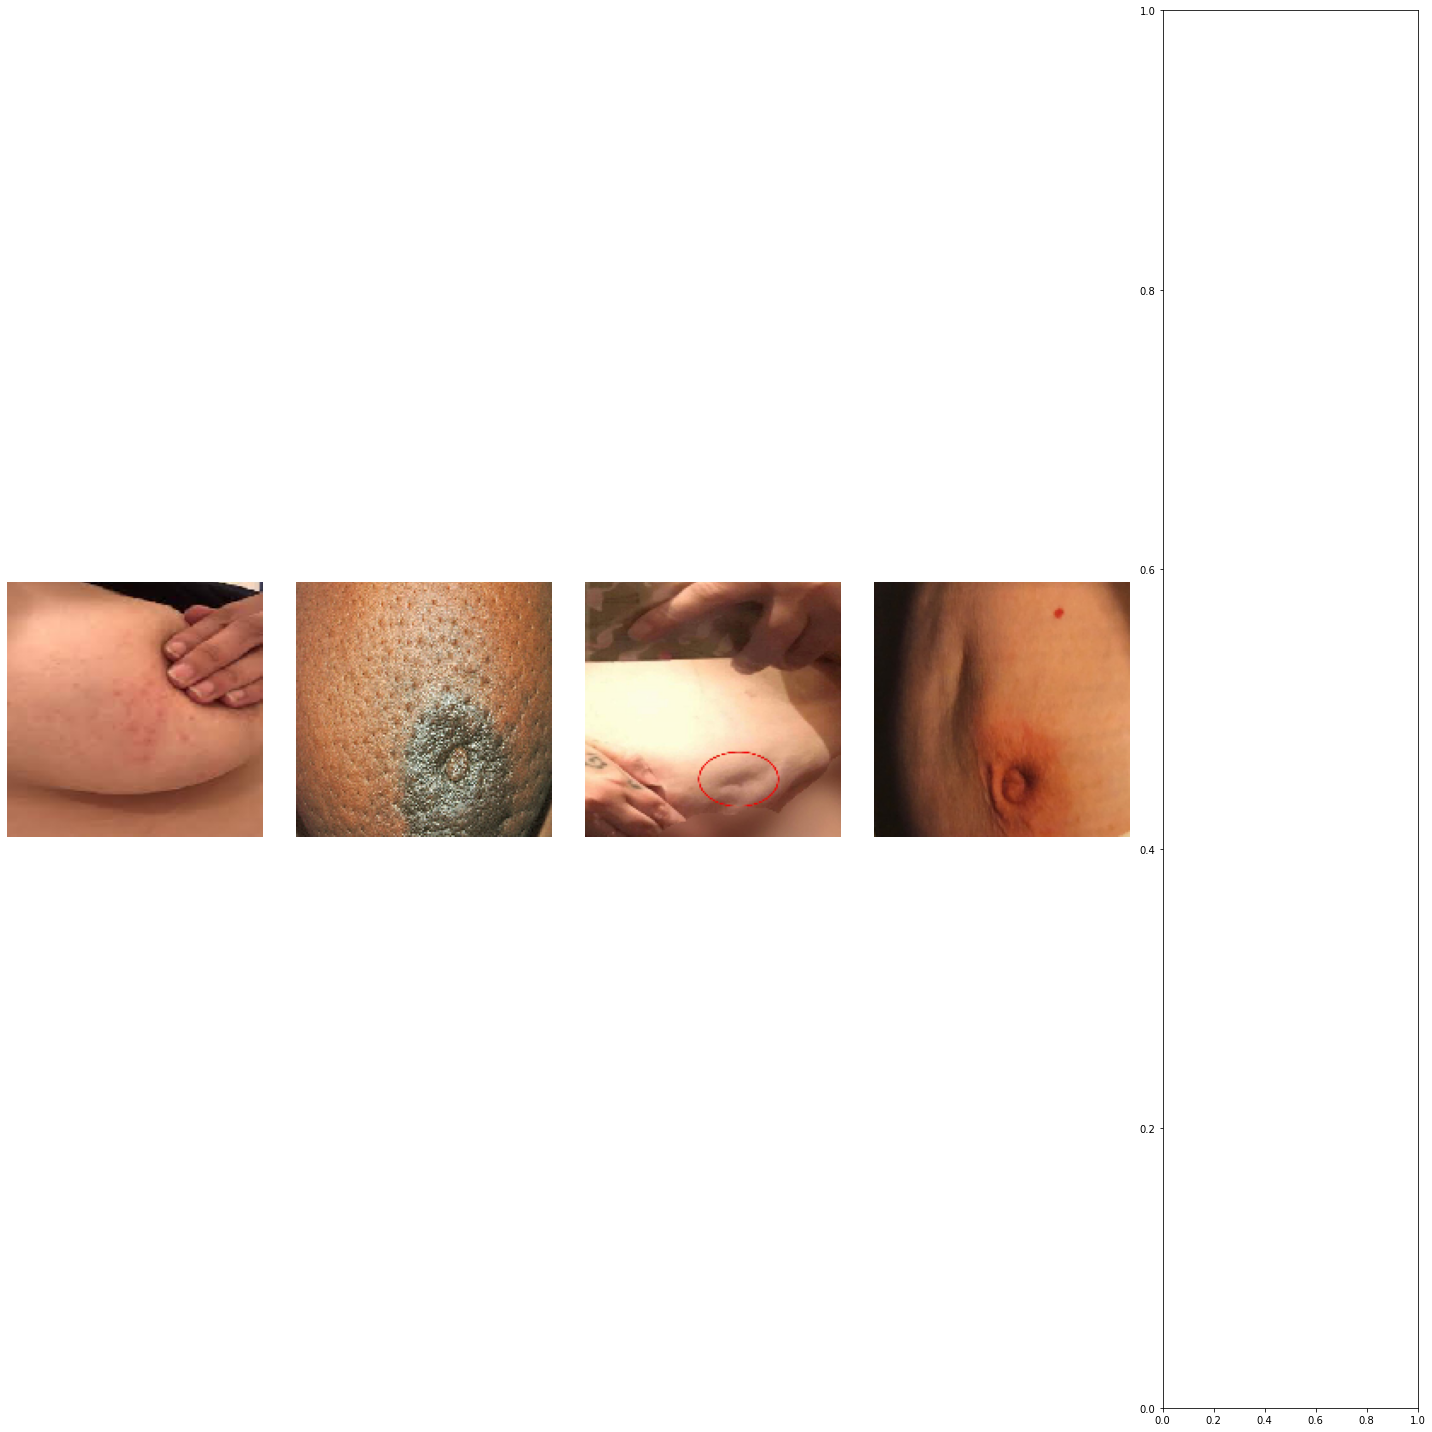

In [20]:
plotImages(sample_training_images[:4])

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [24]:
history = model.fit_generator(
    train_data_gen,epochs=epochs,
    validation_data=val_data_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
11/11 [==============================] - 18s 2s/step - loss: 0.8510 - accuracy: 0.8039 - val_loss: 0.4667 - val_accuracy: 0.8444
Epoch 2/15
11/11 [==============================] - 4s 325ms/step - loss: 0.2867 - accuracy: 0.9216 - val_loss: 0.3242 - val_accuracy: 0.8667
Epoch 3/15
11/11 [==============================] - 3s 318ms/step - loss: 0.4621 - accuracy: 0.9216 - val_loss: 0.2496 - val_accuracy: 0.9333
Epoch 4/15
11/11 [==============================] - 4s 369ms/step - loss: 0.1845 - accuracy: 0.9608 - val_loss: 0.2213 - val_accuracy: 0.9333
Epoch 5/15
11/11 [==============================] - 3s 315ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 0.5074 - val_accuracy: 0.8889
Epoch 6/15
11/11 [==============================] - 4s 320ms/step - loss: 0.1189 - accuracy: 0.9804 - val_loss: 0.1066 - val_accuracy: 0.9778
Epoch 7/15
11/11 [==============================] - 4s 321ms/step - loss: 

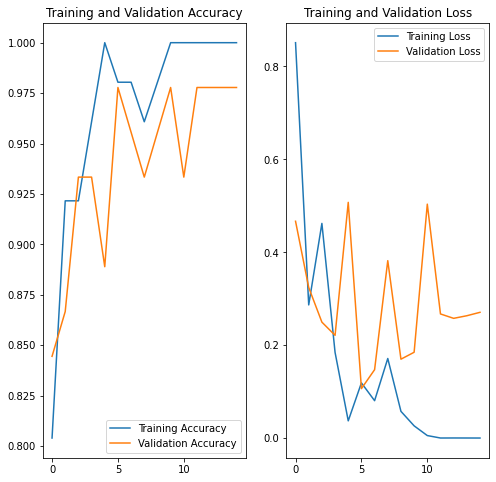

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()